Project Title: "Personal Expense Tracker"

Objective
Develop a Python application that allows users to track and analyze their daily expenses using
concepts learned in the course, including file handling, data structures, loops, NumPy, and
Pandas.

In [2]:
#User Input and Data Storage
import numpy as np
import pandas as pd
Data_file = "/content/Project data.csv"
read_data = pd.read_csv(Data_file)
print(read_data)

          Date       Category Amount Description
0    9/28/2024           Rent  $2.36     Concert
1   11/27/2024           Food  $8.46     Concert
2    2/16/2024           Rent  $7.75       Movie
3    8/10/2024           Rent  $8.58     Concert
4    5/24/2024  Entertainment  $2.52    Shopping
..         ...            ...    ...         ...
95   2/10/2024  Entertainment  $2.92    Shopping
96   11/2/2024           Rent  $9.59     Concert
97   11/3/2024  Entertainment  $6.25    Shopping
98   5/23/2024           Food  $4.43        Park
99   7/14/2024  Entertainment  $0.41        Park

[100 rows x 4 columns]


In [4]:
#expenses summary and data analysis
#Read the CSV file
file_path = '/content/Project data.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
    exit()

# Remove the $ sign and convert to numeric
df['Amount'] = df['Amount'].replace({'\$': ''}, regex=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Step 3: Check for NaN values (caused by invalid entries)
if df['Amount'].isna().any():
    print("Warning: Some entries in the 'Amount' column could not be converted to numbers. They will be excluded.")
    df = df.dropna(subset=['Amount'])

# Step 4: Group by Category and calculate total
grouped_expenses = df.groupby('Category')['Amount'].sum()

# Step 5: Display the results
print("Total Expenses by Category:")
print(grouped_expenses)


Total Expenses by Category:
Category
Entertainment    155.44
Food             192.83
Rent             181.39
Name: Amount, dtype: float64


In [6]:
#monthly
# Read and clean the data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop rows with invalid data
df = df.dropna(subset=['Date', 'Amount'])

# Calculate Monthly Total Expenses
df['Month'] = df['Date'].dt.to_period('M')
monthly_expenses = df.groupby('Month')['Amount'].sum()

# Calculate Average Daily Expenses
daily_expenses = df.groupby('Date')['Amount'].sum()
average_daily_expense = daily_expenses.mean()

# Print Results
print("Monthly Total Expenses:")
print(monthly_expenses)

print(f"\nAverage Daily Expense: {average_daily_expense:.2f}")


Monthly Total Expenses:
Month
2023-12    34.82
2024-01    24.54
2024-02    49.73
2024-03    34.45
2024-04    33.11
2024-05    41.48
2024-06    35.36
2024-07    40.76
2024-08    47.87
2024-09    63.72
2024-10    52.45
2024-11    64.57
2024-12     6.80
Freq: M, Name: Amount, dtype: float64

Average Daily Expense: 6.38


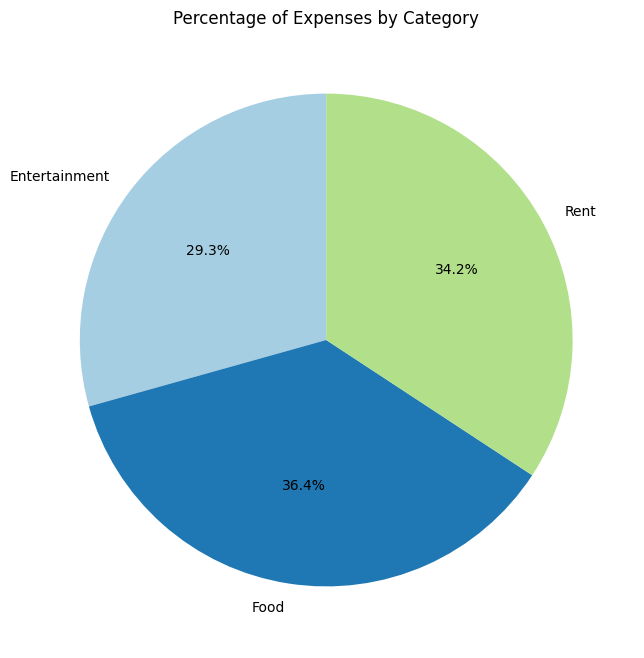

In [7]:
#visualization
import matplotlib.pyplot as plt

# Group expenses by Category
category_expenses = df.groupby('Category')['Amount'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
category_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Expenses by Category')
plt.ylabel('')
plt.show()


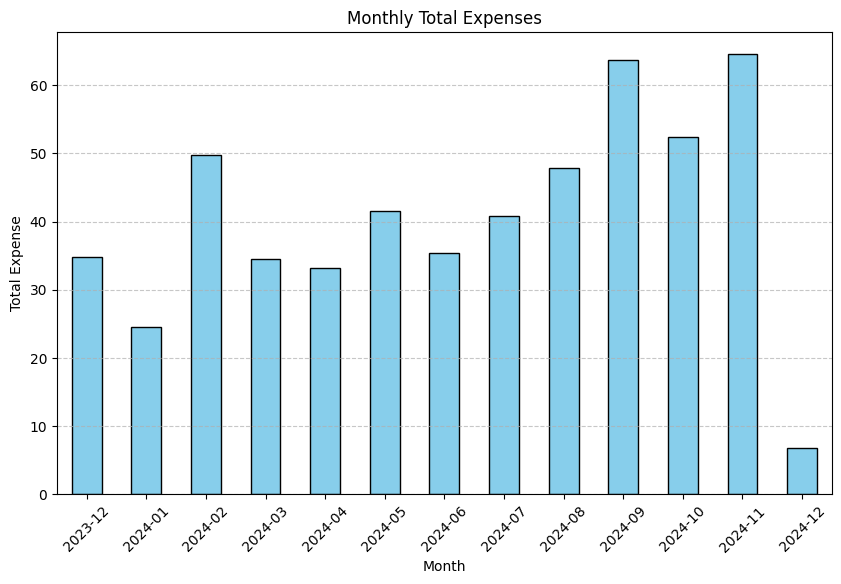

In [8]:
# Bar chart for Monthly Expenses
plt.figure(figsize=(10, 6))
monthly_expenses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Monthly Total Expenses')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


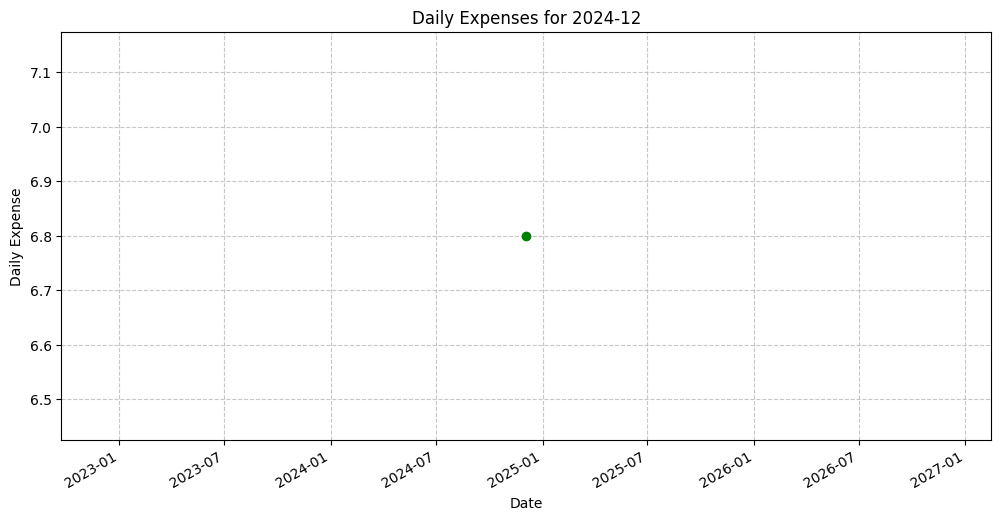

In [9]:
# Filter data for a selected month (e.g., December 2024)
selected_month = '2024-12'
daily_expenses_selected_month = df[df['Date'].dt.to_period('M') == selected_month].groupby('Date')['Amount'].sum()

# Line graph for Daily Expenses
plt.figure(figsize=(12, 6))
daily_expenses_selected_month.plot(kind='line', marker='o', color='green')
plt.title(f'Daily Expenses for {selected_month}')
plt.xlabel('Date')
plt.ylabel('Daily Expense')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-10-5f8ddaac2234>:15: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(daily_expenses_selected_month.index.min(), daily_expenses_selected_month.index.max())


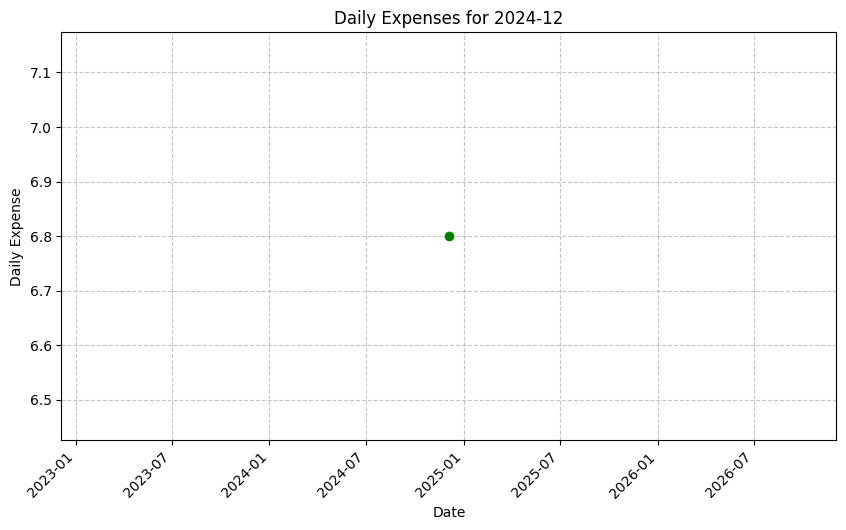

In [10]:
import matplotlib.pyplot as plt

# Ensure data is filtered correctly for the selected month
selected_month = '2024-12'
daily_expenses_selected_month = df[df['Date'].dt.to_period('M') == selected_month].groupby('Date')['Amount'].sum()

# Check if there are enough data points
if not daily_expenses_selected_month.empty:
    plt.figure(figsize=(10, 6))
    daily_expenses_selected_month.plot(kind='line', marker='o', color='green')
    plt.title(f'Daily Expenses for {selected_month}')
    plt.xlabel('Date')
    plt.ylabel('Daily Expense')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.xlim(daily_expenses_selected_month.index.min(), daily_expenses_selected_month.index.max())
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"No data available for the selected month: {selected_month}")


In [11]:
print(f"Data for {selected_month}:")
print(daily_expenses_selected_month)


Data for 2024-12:
Date
2024-12-04    6.8
Name: Amount, dtype: float64


In [17]:
import pandas as pd

df = pd.read_csv("/content/Project data.csv")

# Convert 'Date' to datetime and 'Amount' to numeric for consistency
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Function 1: Add a new expense with user input
def add_expense():
    date = input("Enter the date (YYYY-MM-DD): ")
    category = input("Enter the category (e.g., Food, Rent, Entertainment): ")
    amount = input("Enter the amount: ")
    description = input("Enter the description: ")

    try:
        # Convert date and amount to appropriate data types
        date = pd.to_datetime(date, errors='coerce')
        amount = float(amount)

        # Ensure valid date and amount input
        if pd.isna(date):
            print("Invalid date format! Please enter the date in YYYY-MM-DD format.")
            return
        if amount <= 0:
            print("Invalid amount! Please enter a positive number for the amount.")
            return

        # Create a new entry and append it to the DataFrame
        new_expense = pd.DataFrame({
            'Date': [date],
            'Category': [category],
            'Amount': [amount],
            'Description': [description]
        })
        global df
        df = pd.concat([df, new_expense], ignore_index=True)  # Append new entry
        df.to_csv("your_file.csv", index=False)  # Save the updated file
        print("Expense added successfully!")

    except ValueError:
        print("Invalid input for amount. Please enter a numeric value.")

# Example usage of the function to add an expense:
add_expense()


Enter the date (YYYY-MM-DD): 2024-12-01
Enter the category (e.g., Food, Rent, Entertainment): Food
Enter the amount: 25
Enter the description: Movie
Expense added successfully!


In [18]:
#Bonus
import re
import pandas as pd

# Load the data from CSV
def load_data():
    try:
        df = pd.read_csv("/content/Project data.csv")
    except FileNotFoundError:
        print("Error: The file '/content/Project data.csv' was not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error loading data: {e}")
        return pd.DataFrame()
    return df

# Date validation using RegEx (YYYY-MM-DD format)
def validate_date(date_str):
    pattern = r"^\d{4}-\d{2}-\d{2}$"
    if re.match(pattern, date_str):
        return True
    else:
        print("Invalid date format. Please enter date as YYYY-MM-DD.")
        return False

# Add new expense (with exception handling)
def add_expense():
    try:
        date = input("Enter expense date (YYYY-MM-DD): ")
        while not validate_date(date):
            date = input("Enter valid expense date (YYYY-MM-DD): ")

        category = input("Enter expense category (e.g., Food, Rent, Entertainment): ")
        amount = input("Enter expense amount: ")

        # Check if amount is a valid number
        try:
            amount = float(amount)
            if amount < 0:
                print("Amount cannot be negative. Please enter a valid amount.")
                return
        except ValueError:
            print("Invalid amount. Please enter a valid number.")
            return

        description = input("Enter a short description of the expense: ")

        # Create a new row of data
        new_expense = pd.DataFrame([[date, category, amount, description]], columns=["Date", "Category", "Amount", "Description"])

        # Load the existing data and append the new expense
        df = load_data()
        if df.empty:
            df = new_expense
        else:
            df = pd.concat([df, new_expense], ignore_index=True)

        # Save the updated data to CSV
        df.to_csv("expenses.csv", index=False)
        print("Expense added successfully.")

    except Exception as e:
        print(f"An error occurred while adding the expense: {e}")

# Main function or menu to interact with the user
def main():
    print("Welcome to the Personal Expense Tracker!")
    while True:
        print("\n1. Add New Expense")
        print("2. Exit")
        choice = input("Choose an option: ")

        if choice == "1":
            add_expense()
        elif choice == "2":
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the main function
if __name__ == "__main__":
    main()


Welcome to the Personal Expense Tracker!

1. Add New Expense
2. Exit
Choose an option: 2
Exiting the program.


In [21]:
#keyword searching
import pandas as pd
import re

# Load the data from CSV
def load_data():
    try:
        df = pd.read_csv("/content/Project data.csv")
    except FileNotFoundError:
        print("Error: The file '/content/Project data.csv' was not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error loading data: {e}")
        return pd.DataFrame()
    return df


def search_expenses():
    keyword = input("Enter a keyword to search for in expense descriptions: ")

    # Load the data
    df = load_data()

    if df.empty:
        print("No data available.")
        return

    matching_expenses = df[df['Description'].str.contains(re.escape(keyword), case=False, na=False)]
    if not matching_expenses.empty:
        print("\nMatching Expenses:")
        print(matching_expenses[['Date', 'Category', 'Amount', 'Description']])
    else:
        print(f"No expenses found matching the keyword: {keyword}")
search_expenses()

Enter a keyword to search for in expense descriptions: Food

Matching Expenses:
          Date       Category Amount  Description
12  11/23/2024           Rent  $8.73  Street food
21    6/8/2024           Food  $3.62  Street food
24   6/21/2024  Entertainment  $7.43  Street food
25  12/11/2023           Food  $2.64  Street food
27   9/19/2024  Entertainment  $1.97  Street food
38   6/18/2024  Entertainment  $2.67  Street food
49  10/31/2024  Entertainment  $4.30  Street food
51   8/17/2024           Rent  $6.24  Street food
54    2/4/2024           Food  $1.68  Street food
58   10/1/2024  Entertainment  $6.42  Street food
65    6/6/2024           Rent  $5.68  Street food
68   8/31/2024  Entertainment  $3.03  Street food
78    7/4/2024           Rent  $5.09  Street food


In [26]:
#user interaction
def main_menu():
    while True:
        print("\n--- Expense Tracker ---")
        print("1. Add a new expense")
        print("2. View expense summaries")
        print("3. Update an expense")
        print("4. Delete an expense")
        print("5. Export filtered data to CSV")
        print("6. Exit")

        choice = int(input("Enter your choice: "))

        if choice == 1:
            add_expense()
        elif choice == 2:
            view_summaries()
        elif choice == 3:
            update_expense()
        elif choice == 4:
            delete_expense()
        elif choice == 5:
            export_data()
        elif choice == 6:
            print("Exiting...")
            break
        else:
            print("Invalid choice, please try again.")
main_menu()


--- Expense Tracker ---
1. Add a new expense
2. View expense summaries
3. Update an expense
4. Delete an expense
5. Export filtered data to CSV
6. Exit
Enter your choice: 6
Exiting...


In [27]:
#view summary
def view_summaries():
    print("\n--- View Expense Summaries ---")
    print("1. Daily Summary")
    print("2. Monthly Summary")
    print("3. Category-wise Summary")

    choice = int(input("Enter your choice: "))

    df = load_data()
    if df.empty:
        print("No data available.")
        return

    if choice == 1:
        print("\nDaily Summary:")
        print(df.groupby("Date")["Amount"].sum())  # Sum by date
    elif choice == 2:
        print("\nMonthly Summary:")
        df['Month'] = pd.to_datetime(df['Date']).dt.month
        print(df.groupby("Month")["Amount"].sum())  # Sum by month
    elif choice == 3:
        print("\nCategory-wise Summary:")
        print(df.groupby("Category")["Amount"].sum())  # Sum by category
    else:
        print("Invalid choice, please try again.")
view_summaries()


--- View Expense Summaries ---
1. Daily Summary
2. Monthly Summary
3. Category-wise Summary
Enter your choice: 1

Daily Summary:
Date
1/11/2024              $7.38
1/13/2024              $1.57
1/23/2024              $9.20
1/27/2024              $6.39
10/1/2024              $6.42
                  ...       
9/14/2024              $9.22
9/18/2024              $8.96
9/19/2024              $1.97
9/28/2024    $2.36$6.62$8.67
9/9/2024               $6.56
Name: Amount, Length: 83, dtype: object


In [32]:
#update
def update_expense():
    expense_id = int(input("Enter the expense ID to update: "))
    df = load_data()
    if df.empty or expense_id not in df.index:
        print("Expense ID not found.")
        return

    print("Enter new values or press Enter to keep the current value.")
    date = input(f"Current date: {df.loc[expense_id, 'Date']}. New date: ")
    category = input(f"Current category: {df.loc[expense_id, 'Category']}. New category: ")
    amount = input(f"Current amount: {df.loc[expense_id, 'Amount']}. New amount: ")
    description = input(f"Current description: {df.loc[expense_id, 'Description']}. New description: ")

    if date: df.loc[expense_id, 'Date'] = date
    if category: df.loc[expense_id, 'Category'] = category
    if amount: df.loc[expense_id, 'Amount'] = float(amount)
    if description: df.loc[expense_id, 'Description'] = description

    df.to_csv("new_expenses.csv", index=False)
    print("Expense updated successfully!")
update_expense()

Enter the expense ID to update: 3
Enter new values or press Enter to keep the current value.
Current date: 8/10/2024. New date: 8/8/2024
Current category: Rent. New category: new rent
Current amount: $8.58. New amount: 6
Current description: Concert. New description: nothing
Expense updated successfully!


In [34]:
#deleting
def delete_expense():
    expense_id = int(input("Enter the expense ID to delete: "))
    df = load_data()
    if df.empty or expense_id not in df.index:
        print("Expense ID not found.")
        return

    df = df.drop(expense_id)  # Drop the expense entry
    df.to_csv("new_expenses.csv", index=False)  # Save changes
    print("Expense deleted successfully!")
delete_expense()

Enter the expense ID to delete: 3
Expense deleted successfully!


In [35]:
#new data to csv file
def export_data():
    filter_choice = int(input("Export data based on: 1. Category 2. Month: "))

    df = load_data()
    if df.empty:
        print("No data available.")
        return

    if filter_choice == 1:
        category = input("Enter the category to filter: ")
        filtered_df = df[df['Category'].str.contains(category, case=False)]
    elif filter_choice == 2:
        month = int(input("Enter the month (1-12): "))
        filtered_df = df[df['Month'] == month]
    else:
        print("Invalid choice.")
        return

    export_filename = input("Enter the filename to export to (e.g., filtered_data.csv): ")
    filtered_df.to_csv(export_filename, index=False)
    print(f"Data exported to {export_filename} successfully!")
export_data()

Export data based on: 1. Category 2. Month: 1
Enter the category to filter: 1
Enter the filename to export to (e.g., filtered_data.csv): jyoti
Data exported to jyoti successfully!


In [40]:
#statistical numpy
import numpy as np

def analyze_expenses():
    df = load_data()
    if df.empty:
        print("No data available.")
        return

    # Convert 'Amount' column to numeric, handling potential errors
    df['Amount'] = pd.to_numeric(df['Amount'].str.replace('$', '', regex=False), errors='coerce')

    highest_expense = np.max(df['Amount'])
    lowest_expense = np.min(df['Amount'])
    average_expense = np.mean(df['Amount'])

    print(f"Highest Expense: ${highest_expense:.2f}")
    print(f"Lowest Expense: ${lowest_expense:.2f}")
    print(f"Average Expense: ${average_expense:.2f}")

    # Spending trends (days with the highest and lowest expenses)
    day_highest_expense = df.loc[df['Amount'].idxmax(), 'Date']
    day_lowest_expense = df.loc[df['Amount'].idxmin(), 'Date']

    print(f"Day with highest expense: {day_highest_expense}")
    print(f"Day with lowest expense: {day_lowest_expense}")
analyze_expenses()

Highest Expense: $9.84
Lowest Expense: $0.09
Average Expense: $5.30
Day with highest expense: 9/13/2024
Day with lowest expense: 10/31/2024


In [42]:
#integration
def main_menu():
    while True:
        print("\n--- Expense Tracker ---")
        print("1. Add a new expense")
        print("2. View expense summaries")
        print("3. Update an expense")
        print("4. Delete an expense")
        print("5. Export filtered data to CSV")
        print("6. Analyze expenses (Statistical Measures)")
        print("7. Exit")

        choice = int(input("Enter your choice: "))

        if choice == 1:
            add_expense()
        elif choice == 2:
            view_summaries()
        elif choice == 3:
            update_expense()
        elif choice == 4:
            delete_expense()
        elif choice == 5:
            export_data()
        elif choice == 6:
            analyze_expenses()
        elif choice == 7:
            print("Exiting...")
            break
        else:
            print("Invalid choice, please try again.")
main_menu()


--- Expense Tracker ---
1. Add a new expense
2. View expense summaries
3. Update an expense
4. Delete an expense
5. Export filtered data to CSV
6. Analyze expenses (Statistical Measures)
7. Exit
Enter your choice: 7
Exiting...
